In [51]:
import h5py
from pathlib import Path
import numpy as np
import pandas as pd
import cv2

from utils import plot_imgs
from jointrecog.settings import DATA_PATH, EXPER_PATH

In [52]:
def conv(im):
    return np.flip(np.moveaxis(im, 0, -1), -1)
def draw_keypoints(img, kp, color=(0, 255, 0)):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in kp]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)

In [53]:
data_file = Path(DATA_PATH, 'testing.h5')
submission_file = Path(EXPER_PATH, 'outputs', 'resnet_fc_no-sym.csv')

In [54]:
kp = pd.read_csv(submission_file).values[:, 1:].reshape(-1, 21, 2)
kp = np.flip(kp, axis=-1)
test = h5py.File(Path(DATA_PATH, 'testing.h5'), 'r')['test']

In [55]:
def gen_image():
    for t in test['img']: yield t
def gen_kp():
    for k in kp: yield k
g_image = gen_image()
g_kp = gen_kp()

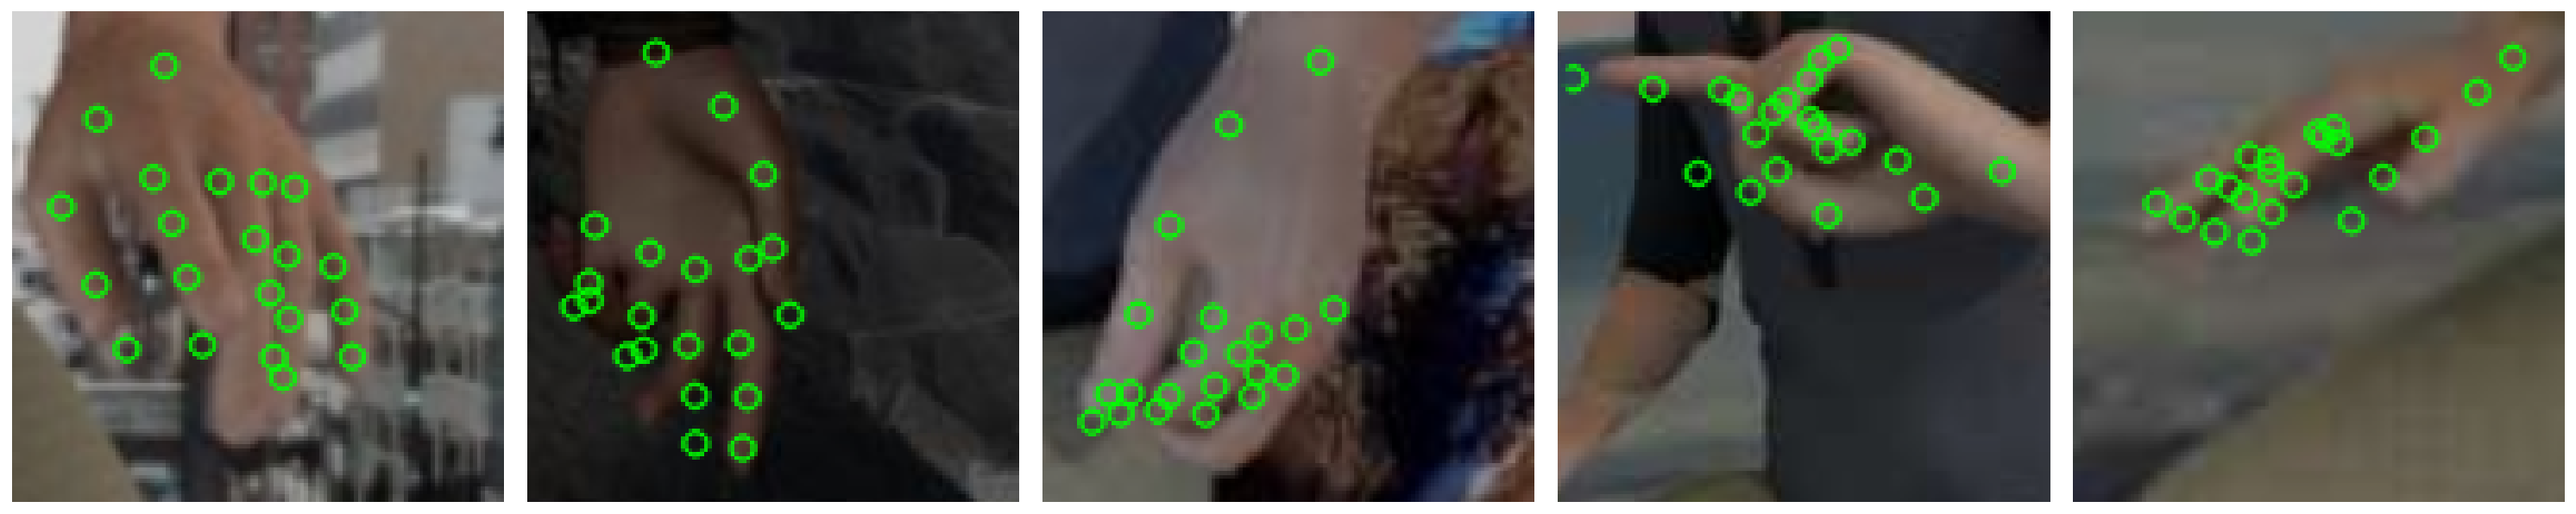

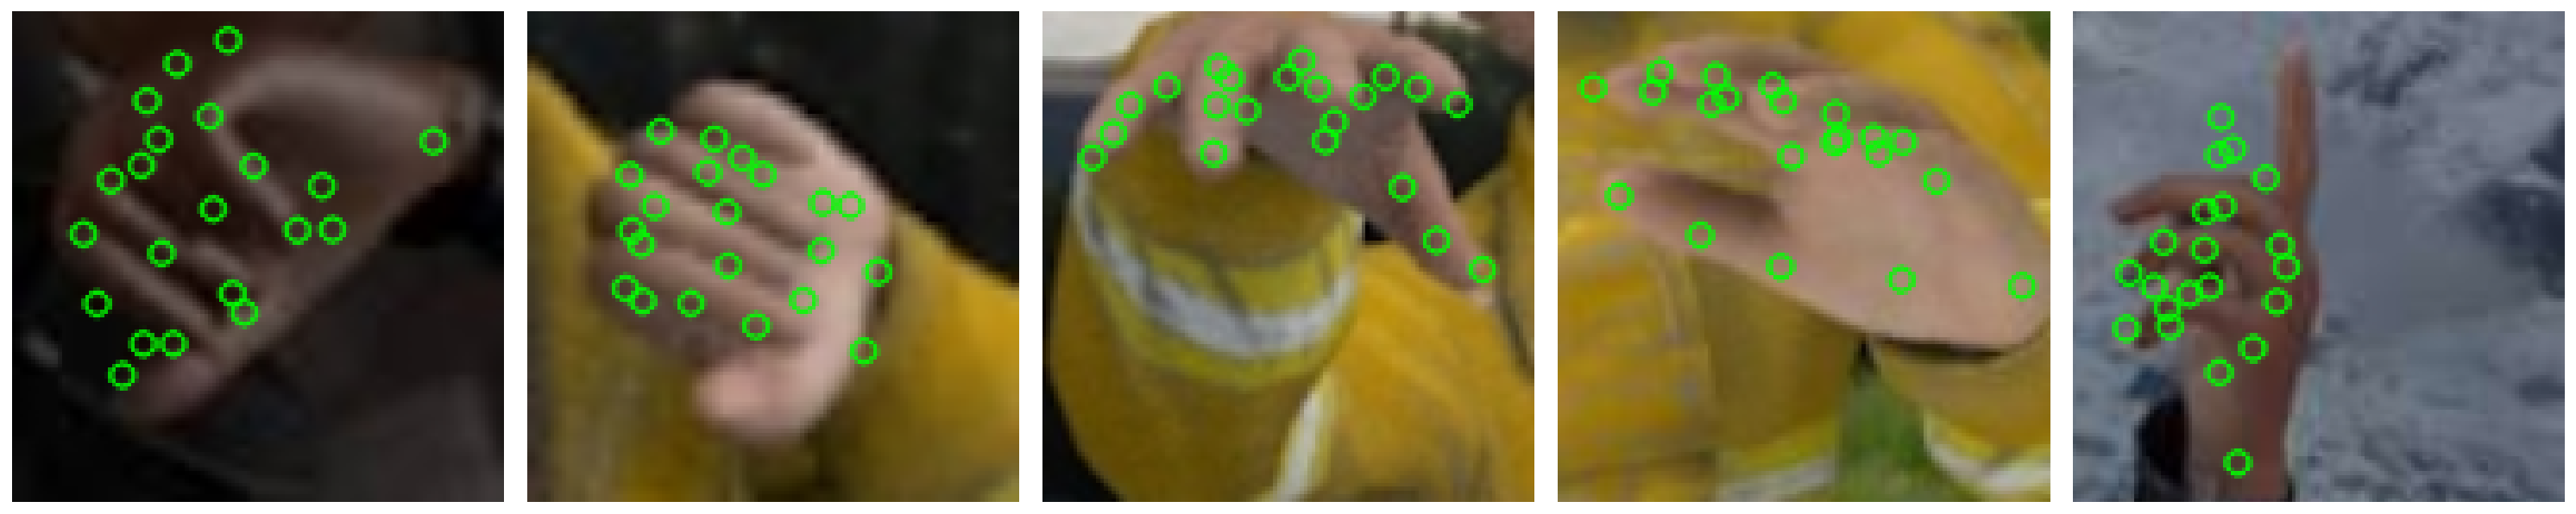

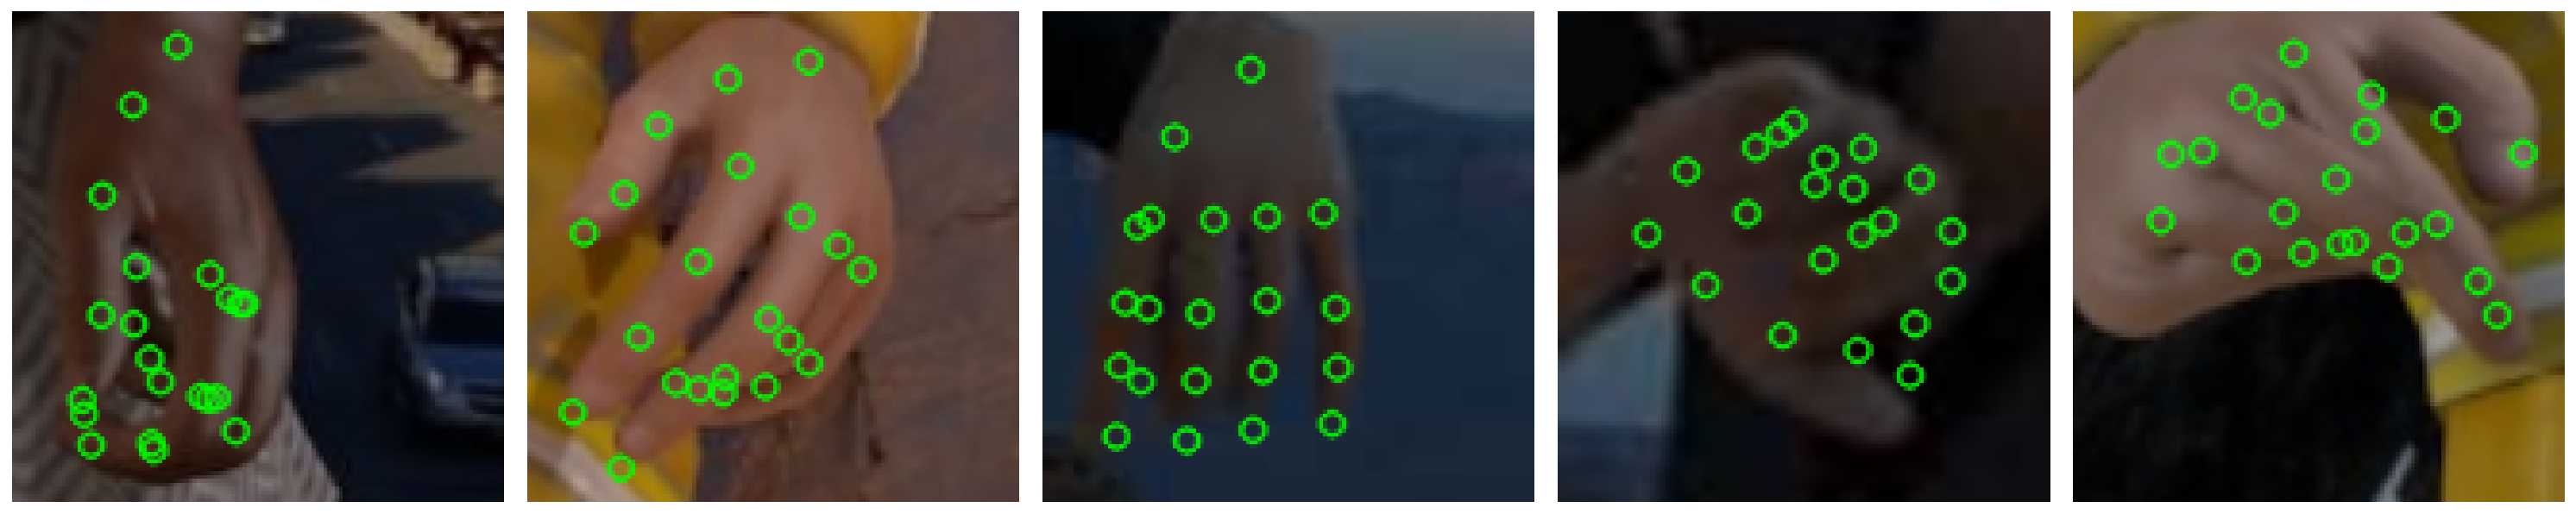

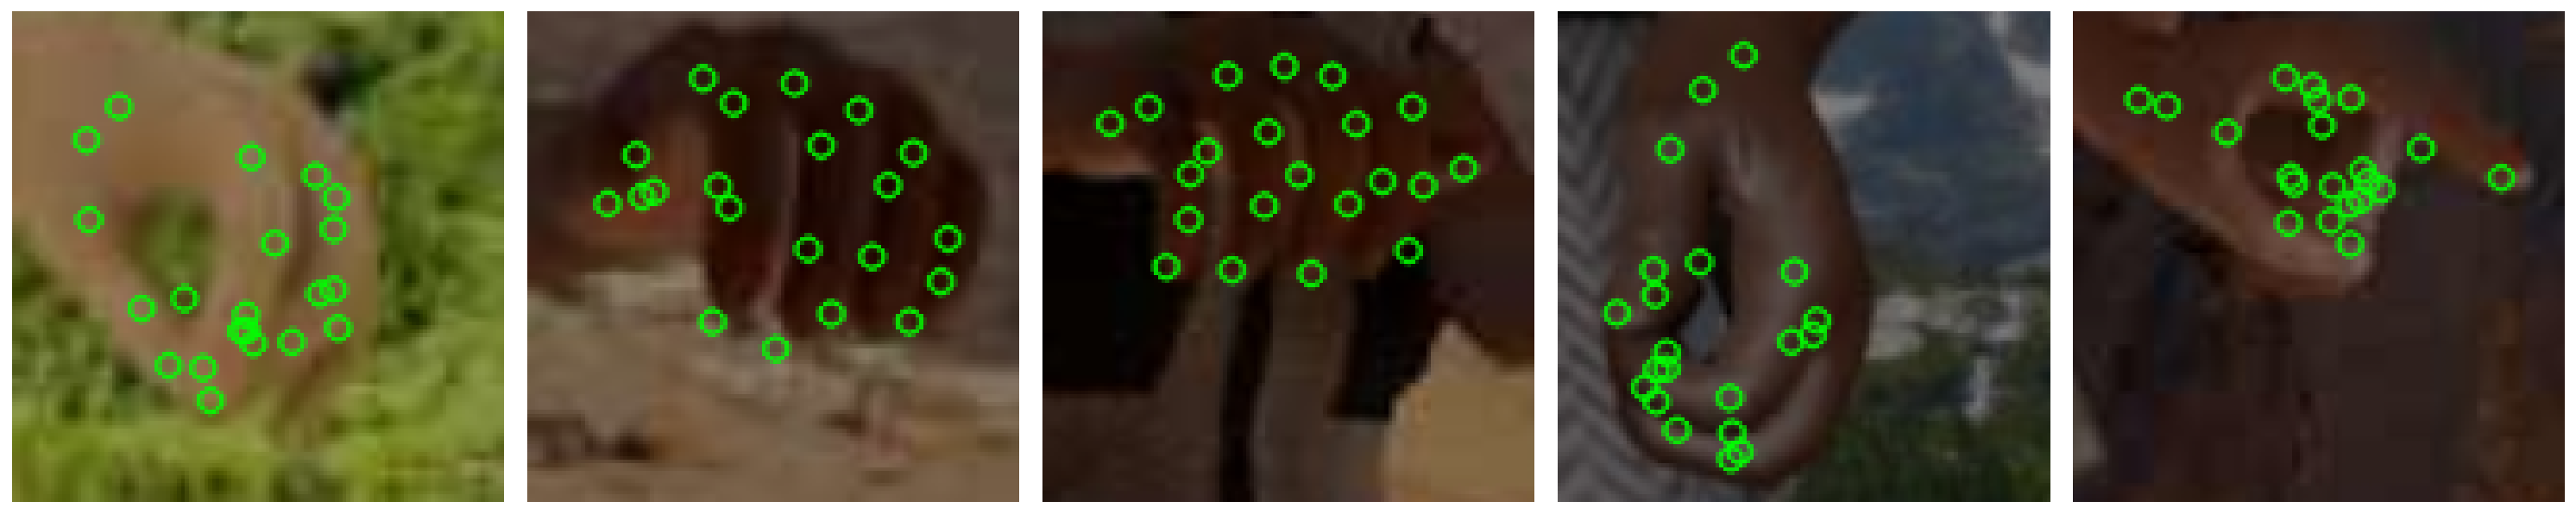

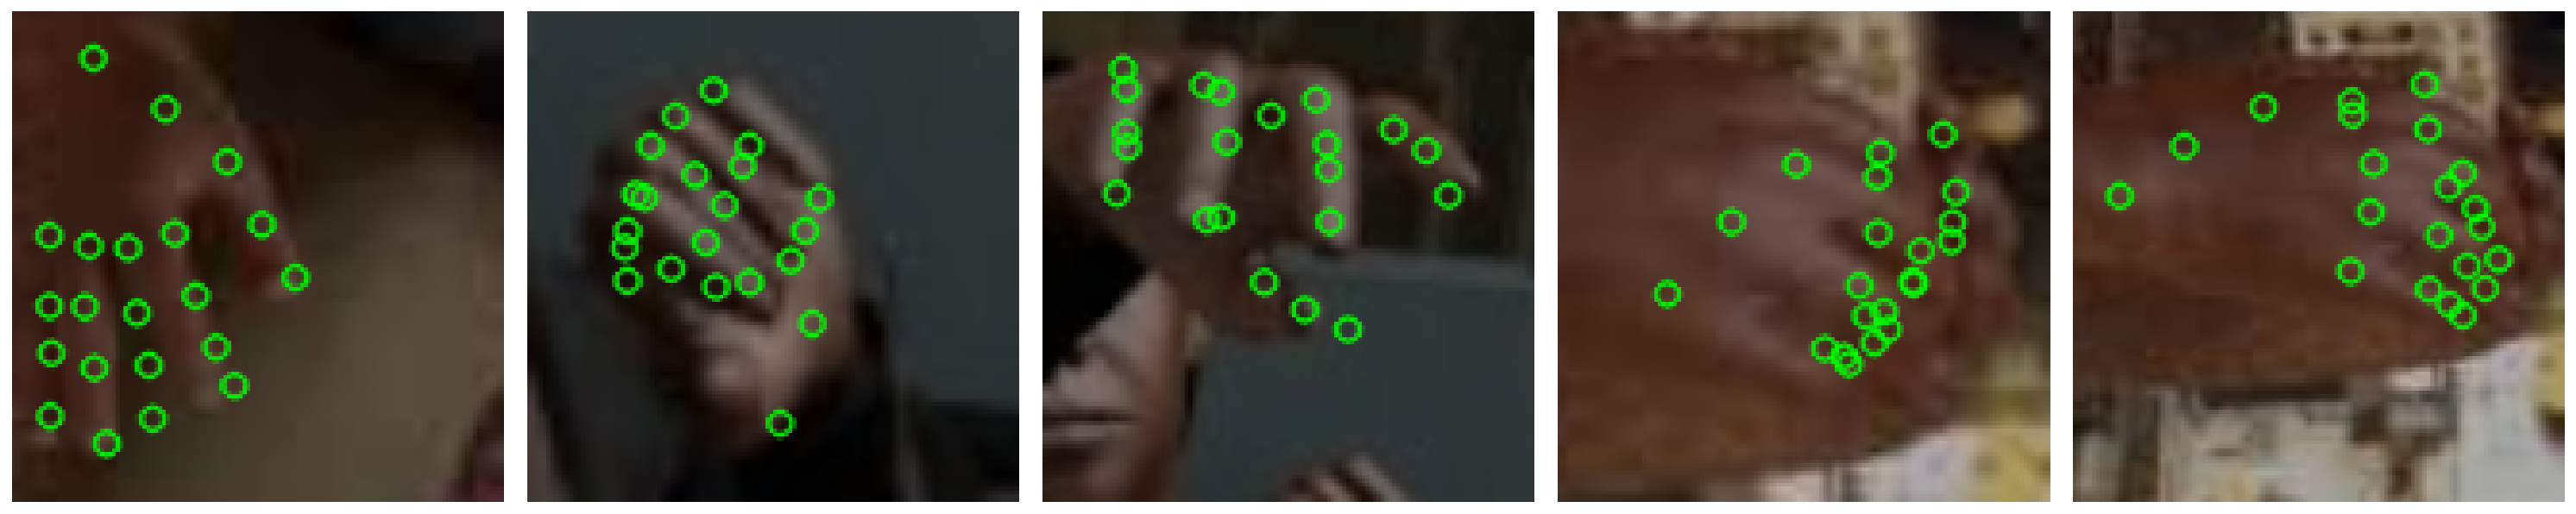

In [56]:
for _ in range(5):
    plot_imgs([draw_keypoints(conv(next(g_image)), next(g_kp))/255. for _ in range(5)])